# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + city # + "&appid=" + weather_api_key

requests.get(city_url).json()

{'coord': {'lon': -36.5092, 'lat': -54.2811},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 32.79,
  'feels_like': 20.44,
  'temp_min': 32.79,
  'temp_max': 32.79,
  'pressure': 988,
  'humidity': 89,
  'sea_level': 988,
  'grnd_level': 984},
 'visibility': 389,
 'wind': {'speed': 22.15, 'deg': 245, 'gust': 35.25},
 'snow': {'1h': 1.52},
 'clouds': {'all': 72},
 'dt': 1682198716,
 'sys': {'country': 'GS', 'sunrise': 1682155674, 'sunset': 1682191256},
 'timezone': -7200,
 'id': 3426466,
 'name': 'Grytviken',
 'cod': 200}

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ouadda
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | kingston
Processing Record 9 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 10 of Set 1 | karkira
Processing Record 11 of Set 1 | saint-denis
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | gobabis
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | olyokminsk
Processing Record 18 of Set 1 | ruteng
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | villa gesell
Processing Record 22 

Processing Record 36 of Set 4 | ferizli
Processing Record 37 of Set 4 | belyy yar
Processing Record 38 of Set 4 | goure
Processing Record 39 of Set 4 | el calafate
Processing Record 40 of Set 4 | san jose village
City not found. Skipping...
Processing Record 41 of Set 4 | toliara
Processing Record 42 of Set 4 | holualoa
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | bismarck
Processing Record 45 of Set 4 | bardai
Processing Record 46 of Set 4 | tomatlan
Processing Record 47 of Set 4 | ambovombe
Processing Record 48 of Set 4 | port glaud
City not found. Skipping...
Processing Record 49 of Set 4 | shaowu
Processing Record 0 of Set 5 | fuyuan
Processing Record 1 of Set 5 | ingeniero jacobacci
Processing Record 2 of Set 5 | malpe
Processing Record 3 of Set 5 | egilsstadir
Processing Record 4 of Set 5 | anabar
City not found. Skipping...
Processing Record 5 of Set 5 | tabuk
Processing Record 6 of Set 5 | queenstown
Processing Record 7 of Set 5 | nemuro
Processin

Processing Record 27 of Set 8 | filey
Processing Record 28 of Set 8 | nova sintra
Processing Record 29 of Set 8 | codrington
Processing Record 30 of Set 8 | dniprorudne
Processing Record 31 of Set 8 | nadi
Processing Record 32 of Set 8 | soriano nel cimino
Processing Record 33 of Set 8 | del rio
Processing Record 34 of Set 8 | bamboo flat
Processing Record 35 of Set 8 | howrah
Processing Record 36 of Set 8 | ipueiras
Processing Record 37 of Set 8 | karasburg
Processing Record 38 of Set 8 | anloga
Processing Record 39 of Set 8 | sanya
Processing Record 40 of Set 8 | betioky
Processing Record 41 of Set 8 | yankton
Processing Record 42 of Set 8 | stellenbosch
Processing Record 43 of Set 8 | obihiro
Processing Record 44 of Set 8 | miedzyzdroje
Processing Record 45 of Set 8 | broome
Processing Record 46 of Set 8 | dossor
Processing Record 47 of Set 8 | mar del plata
Processing Record 48 of Set 8 | gadzhiyevo
Processing Record 49 of Set 8 | sao joao da barra
Processing Record 0 of Set 9 | gr

Processing Record 20 of Set 12 | kwang binh
Processing Record 21 of Set 12 | satupa'itea
City not found. Skipping...
Processing Record 22 of Set 12 | el paso
Processing Record 23 of Set 12 | kangding
Processing Record 24 of Set 12 | nadym
Processing Record 25 of Set 12 | st. paul
Processing Record 26 of Set 12 | sint michiel liber
Processing Record 27 of Set 12 | taulaga
Processing Record 28 of Set 12 | boonville
Processing Record 29 of Set 12 | ashtabula
Processing Record 30 of Set 12 | cannonvale
Processing Record 31 of Set 12 | paracuru
Processing Record 32 of Set 12 | faya-largeau
Processing Record 33 of Set 12 | kigali
Processing Record 34 of Set 12 | burlington
Processing Record 35 of Set 12 | junin de los andes
Processing Record 36 of Set 12 | claveria
Processing Record 37 of Set 12 | wakkanai
Processing Record 38 of Set 12 | amarante do maranhao
Processing Record 39 of Set 12 | san marcos tlacoyalco
Processing Record 40 of Set 12 | galliano
Processing Record 41 of Set 12 | laba

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [17]:
# Display sample data
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%Y-%m-%d')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,31.73,93,100,19.57,CA,2023-04-22
1,grytviken,-54.2811,-36.5092,32.79,89,72,22.15,GS,2023-04-22
2,port-aux-francais,-49.3500,70.2167,46.69,96,100,38.50,TF,2023-04-22
3,ouadda,8.0777,22.4007,73.31,78,90,6.87,CF,2023-04-22
4,constantia,44.1833,28.6500,43.70,77,92,7.58,RO,2023-04-22


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,31.73,93,100,19.57,CA,2023-04-22
1,grytviken,-54.2811,-36.5092,32.79,89,72,22.15,GS,2023-04-22
2,port-aux-francais,-49.3500,70.2167,46.69,96,100,38.50,TF,2023-04-22
3,ouadda,8.0777,22.4007,73.31,78,90,6.87,CF,2023-04-22
4,constantia,44.1833,28.6500,43.70,77,92,7.58,RO,2023-04-22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

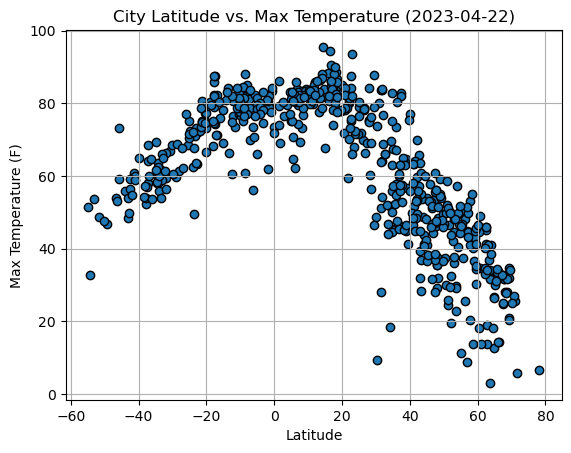

In [37]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_temp = plt.scatter( city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="Black") 

title = f"City Latitude vs. Max Temperature ({city_data_df['Date'].min()})"
plt.title(title)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Lat_vs_Temps_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

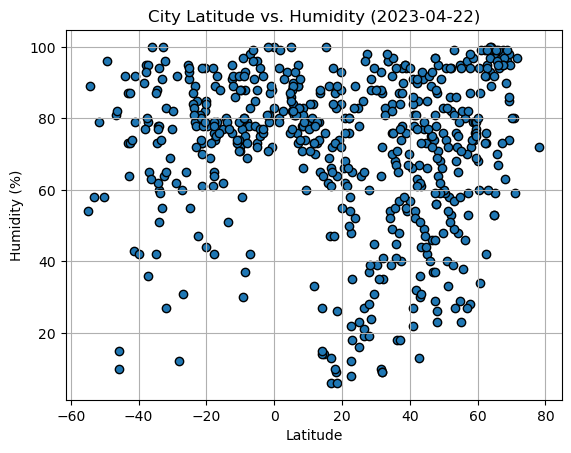

In [35]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_humid = plt.scatter( city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="Black") 

title = f"City Latitude vs. Humidity ({city_data_df['Date'].min()})"

plt.title(title)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/lat_vs_humid_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

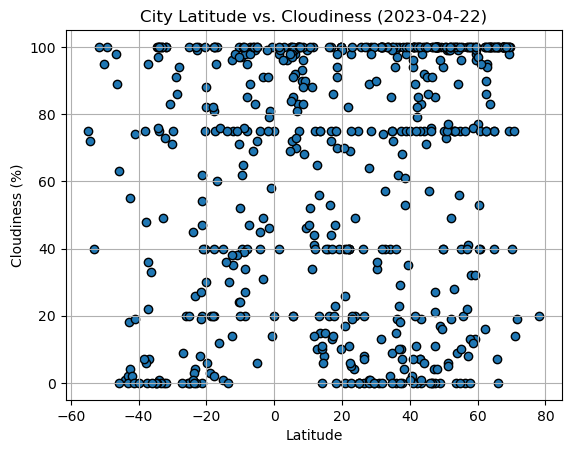

In [34]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_clouds = plt.scatter( city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="Black") 
 
title = f"City Latitude vs. Cloudiness ({city_data_df['Date'].min()})"
    
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/lat_vs_clouds_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

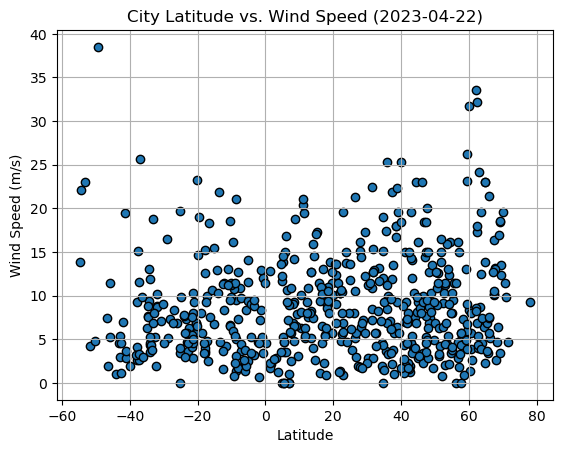

In [33]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_clouds = plt.scatter( city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="Black") 
 
title = f"City Latitude vs. Wind Speed ({city_data_df['Date'].min()})"
    
plt.title(title)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/lat_vs_windspeed_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE